# Pymaceuticals Inc. 

## Analysis

## Based on Summary Statistics, we can conclude that Capomulin and Ramicane are the most effective drug regimens for squamous cell carcinoma (SCC). The mean and median tutor volumes for Capomulin and Ramicane are the lowest when compared to the remainder of drug regimens tested on mice, indicating smaller tumor sizes in response to the abovementioned drug regimens. Their respective effectiveness is also proven by the tumor volume variance values for each drug, with Capomulin sitting second lowest with a 24.9 score and Ramicane sitting lowest with a 23.5 score, signifying a consistent tumor volume decrease rate. Considering that the number of mice on Capomulin and Ramicane is much higher than that of mice on other regiemns we can explain the lower tumor volume variance with the sample population size: the greater the number of specimen, the lower the variance. Considering the Weight vs Tumor Volume for Capomulin scatter plot, we can deduce that a crucial factor impacting tumor size is weight: the greater the weight, the larger the tumor. The relationship between weight and tumor volume is therefore proportional, as can be seen in the linear congregation of scatter points on the graph. Considering the impact that weight has on the regimen's ability to decrease tutor volume,  the mean/median values for Capomulin, as well as its clear and consistent ability to decrease tumor volume (see Capomulin Treatmeant of Mouse l509), it is the most consistently affective drug regimen for SCC. Since the sole outlier of the data is Infubinol, which also reports the highest tumor volume values (see Distrubution of Tumor Volume per Treatment Group), we can conclude that it is the most irregular and least consistent drug regimen to treat SCC. One of the limitations of this dataset is its lack of an equally thorough investigation of the effectiveness of Ramicane, which is a close competitor of Capomulin reporting close numbers as seen in the Summary Statistics section of the analysis. It would be beneficial to perform data analysis and visualizations to see how mice respond to it based on weight and tumor volume, since gender does not appear to have any notable impact on drug regiman effectiveness.   

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single DataFrame
complete_df = pd.merge(study_results,mouse_metadata, how="left", on = ("Mouse ID"))

In [7]:
# Display the data table for preview
complete_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice.
unique_mice = np.unique(complete_df['Mouse ID'])
total_unique_mice = len(unique_mice)
print("Number of mice:", total_unique_mice)

Number of mice: 249


In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = complete_df.loc[complete_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [10]:
#Get all the data for the duplicate mouse ID. 
duplicate_mice_df = complete_df.loc[complete_df["Mouse ID"] == "g989", :]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
complete_data_clean = complete_df[complete_df["Mouse ID"].isin(duplicate_mice) == False]
complete_data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
# Checking the number of mice in the clean DataFrame.
clean_mice = complete_data_clean["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics 

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = complete_data_clean['Tumor Volume (mm3)'].groupby(complete_data_clean['Drug Regimen']).mean()
median = complete_data_clean['Tumor Volume (mm3)'].groupby(complete_data_clean['Drug Regimen']).median()
var = complete_data_clean['Tumor Volume (mm3)'].groupby(complete_data_clean['Drug Regimen']).var()
std = complete_data_clean['Tumor Volume (mm3)'].groupby(complete_data_clean['Drug Regimen']).std()
sem = complete_data_clean['Tumor Volume (mm3)'].groupby(complete_data_clean['Drug Regimen']).sem()

summary_stats = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  complete_data_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts 

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = complete_data_clean["Drug Regimen"].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Mice Per Treatment')

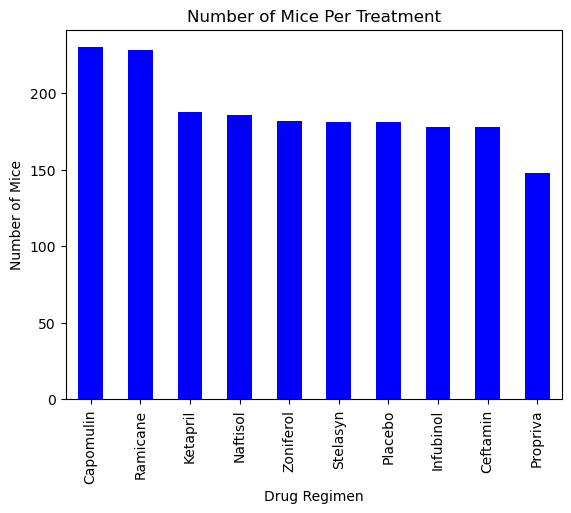

In [21]:
plot_pandas = mice_count.plot.bar(color='b')  
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Per Treatment")

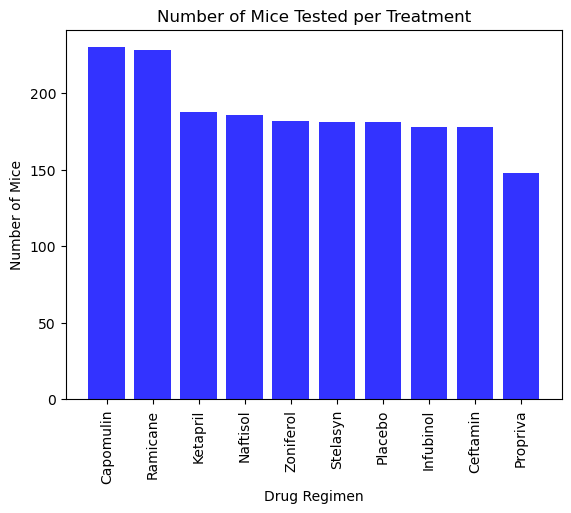

In [22]:
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

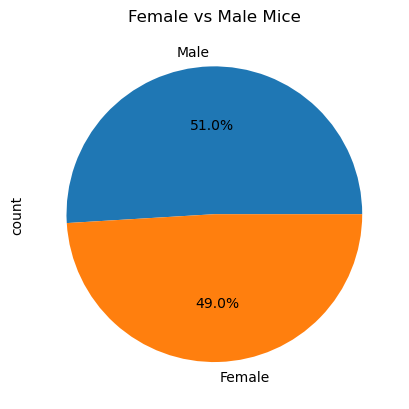

In [23]:
gender_data = complete_data_clean["Sex"].value_counts()
plt.title("Female vs Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

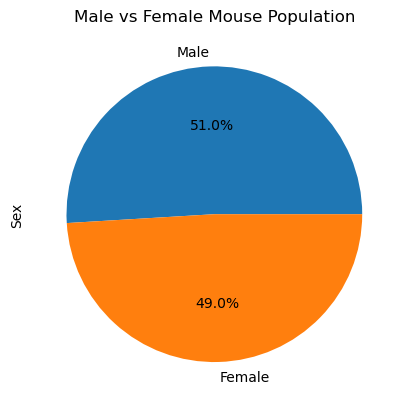

In [24]:
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [85]:
maxt = complete_data_clean.groupby(["Mouse ID"])["Timepoint"].max()
maxt = maxt.reset_index()
merged_max = maxt.merge(complete_data_clean, on = ["Mouse ID", "Timepoint"], how = "left")
merged_max

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [91]:
tumor_list = []
for drug in drug_list:
    vol = merged_max.loc[merged_max["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    tumor_list.append(vol)
    quartiles = vol.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    outliers = vol.loc[(vol<lower_bound)|(vol>upper_bound)]
    print(f"{drug} {outliers}")

Capomulin Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Series([], Name: Tumor Volume (mm3), dtype: float64)


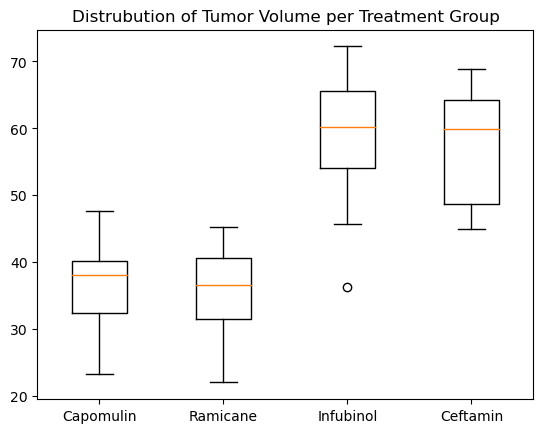

In [95]:
plt.boxplot(tumor_list,labels=drug_list)
plt.title('Distrubution of Tumor Volume per Treatment Group')
plt.show()

## Line and Scatter Plots 

Text(0, 0.5, 'Tumor Volume (mm3)')

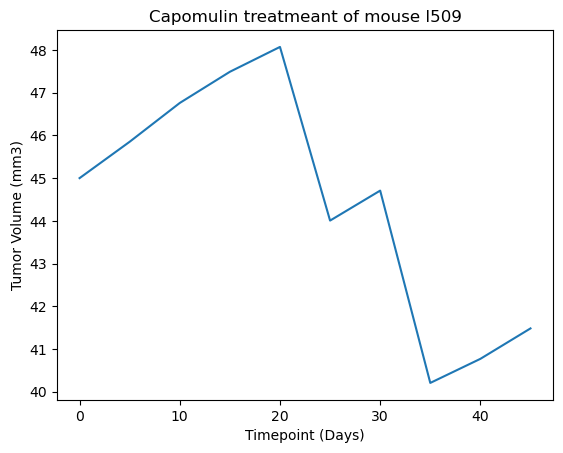

In [75]:
line_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
line_df.head()
x_axis = line_df["Timepoint"]
tumsiz = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz, label="Fahreneit")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

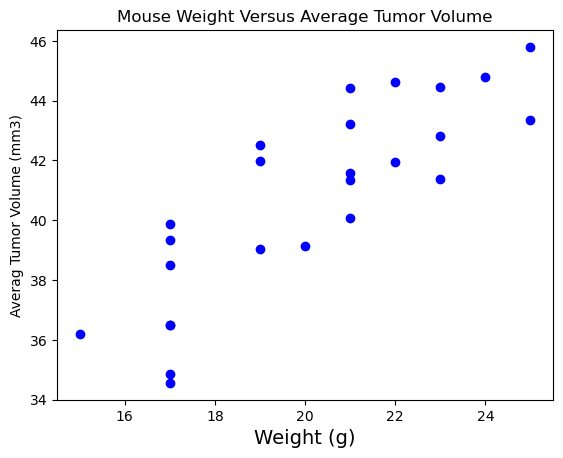

In [76]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo = complete_data_clean.loc[complete_data_clean["Drug Regimen"] == "Capomulin"]
results = capo.groupby(["Mouse ID"])[["Tumor Volume (mm3)" , "Weight (g)"]].mean()

fig1, ax1 = plt.subplots()
marker_size=15
plt.scatter(results['Weight (g)'],results['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [77]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(results['Weight (g)'],results['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


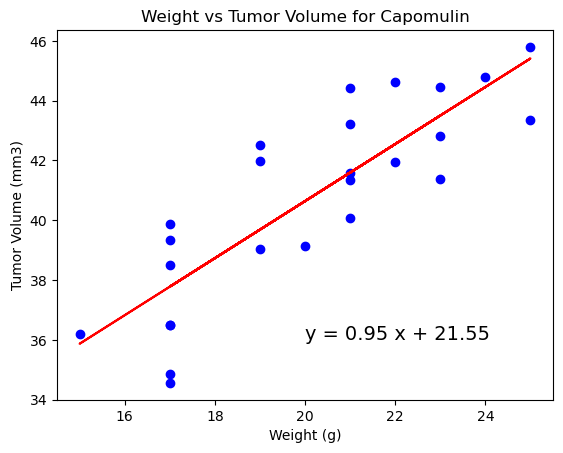

In [94]:
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(results["Weight (g)"],results["Tumor Volume (mm3)"])
regress_values=results["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(results["Weight (g)"],results["Tumor Volume (mm3)"],color='b')
plt.plot(results["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()